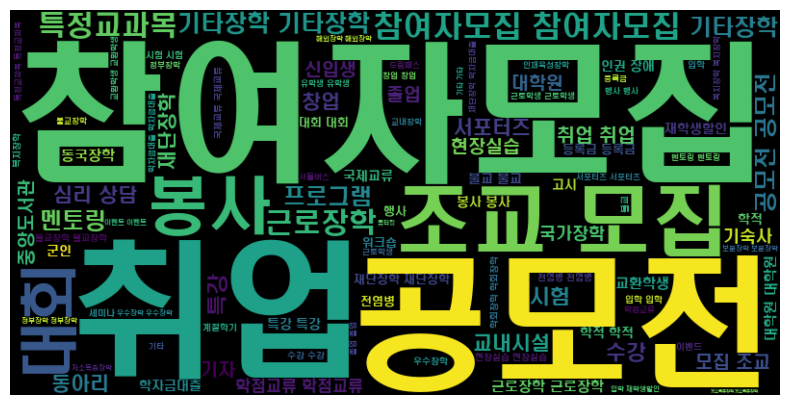

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import font_manager

# CSV 파일 읽기
df = pd.read_csv("./라벨링완료된공지사항.csv") 

# 'class' 열 선택 및 결측치 제거
class_column = df['class'].dropna()

# 분류 기준 단어들을 하나의 문자열로 결합
text = ' '.join(class_column)

# 한글 폰트 경로 지정
font_path = 'C:\Windows\Fonts\H2HDRM.TTF'  # 한글 폰트 파일 경로로 수정해야 함

# WordCloud 객체 생성 및 한글 폰트 설정
wordcloud = WordCloud(font_path=font_path, width=800, height=400).generate(text)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
